# Understand the data

In [1]:
import os
import cv2
import random
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.use("Agg")
%matplotlib inline

import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Flatten)
from tensorflow.keras.layers import (Dense, Lambda, Dropout, Activation)

from tensorflow.keras.layers import (Conv2D, MaxPooling2D)
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [2]:
# Load the styles.csv file
STYLES_CSV_PATH = "/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles.csv"
IMAGES_PATH = "/kaggle/input/fashion-product-images-dataset/fashion-dataset/images/"

styles_df = pd.read_csv(STYLES_CSV_PATH, on_bad_lines='skip')

print(styles_df.shape)
styles_df.head()

(44424, 10)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [3]:
styles_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [4]:
styles_df.describe()

,id,year
count,44424.000000,44423.000000
mean,29696.334301,2012.806497
std,17049.490518,2.126480
min,1163.000000,2007.000000
25%,14768.750000,2011.000000
50%,28618.500000,2012.000000
75%,44683.250000,2015.000000
max,60000.000000,2019.000000


In [5]:
styles_df.isna().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [6]:
# Step 1: Drop missing values
styles_df = styles_df.dropna()

# Step 2: Drop unnecessary columns with error handling
columns_to_drop = ['year', 'productDisplayName', 'masterCategory', 'articleType']
existing_columns = [col for col in columns_to_drop if col in styles_df.columns]

styles_df.drop(columns=existing_columns, inplace=True)


# Step 4: Filter styles based on available images
styles_df = styles_df[styles_df['id'].isin([int(i.split('.')[0]) for i in os.listdir(IMAGES_PATH)])]

# Display the filtered styles DataFrame
print(styles_df.head())

      id gender subCategory baseColour  season   usage
0  15970    Men     Topwear  Navy Blue    Fall  Casual
1  39386    Men  Bottomwear       Blue  Summer  Casual
2  59263  Women     Watches     Silver  Winter  Casual
3  21379    Men  Bottomwear      Black    Fall  Casual
4  53759    Men     Topwear       Grey  Summer  Casual


In [7]:
print(styles_df.shape)
styles_df.head()

(44072, 6)


,id,gender,subCategory,baseColour,season,usage
0,15970,Men,Topwear,Navy Blue,Fall,Casual
1,39386,Men,Bottomwear,Blue,Summer,Casual
2,59263,Women,Watches,Silver,Winter,Casual
3,21379,Men,Bottomwear,Black,Fall,Casual
4,53759,Men,Topwear,Grey,Summer,Casual


In [8]:

# Print unique values in each column
for column in styles_df.columns:
    print(f"Unique values in '{column}':")
    print(styles_df[column].unique())
    print("\n")


Unique values in 'id':
[15970 39386 59263 ... 18842 46694 51623]


Unique values in 'gender':
['Men' 'Women' 'Boys' 'Girls' 'Unisex']


Unique values in 'subCategory':
['Topwear' 'Bottomwear' 'Watches' 'Socks' 'Shoes' 'Belts' 'Flip Flops'
 'Bags' 'Innerwear' 'Sandal' 'Shoe Accessories' 'Fragrance' 'Jewellery'
 'Lips' 'Saree' 'Eyewear' 'Scarves' 'Dress' 'Loungewear and Nightwear'
 'Wallets' 'Apparel Set' 'Headwear' 'Mufflers' 'Skin Care' 'Makeup'
 'Free Gifts' 'Ties' 'Accessories' 'Nails' 'Beauty Accessories'
 'Water Bottle' 'Skin' 'Eyes' 'Bath and Body' 'Gloves'
 'Sports Accessories' 'Cufflinks' 'Sports Equipment' 'Stoles' 'Hair'
 'Perfumes' 'Home Furnishing' 'Umbrellas' 'Wristbands' 'Vouchers']


Unique values in 'baseColour':
['Navy Blue' 'Blue' 'Silver' 'Black' 'Grey' 'Green' 'Purple' 'White'
 'Beige' 'Brown' 'Bronze' 'Teal' 'Copper' 'Pink' 'Off White' 'Maroon'
 'Red' 'Khaki' 'Orange' 'Yellow' 'Charcoal' 'Gold' 'Steel' 'Tan' 'Multi'
 'Magenta' 'Lavender' 'Sea Green' 'Cream' 'Peach' 

Unique values in 'gender':
['Men' 'Women' 'Boys' 'Girls' 'Unisex']




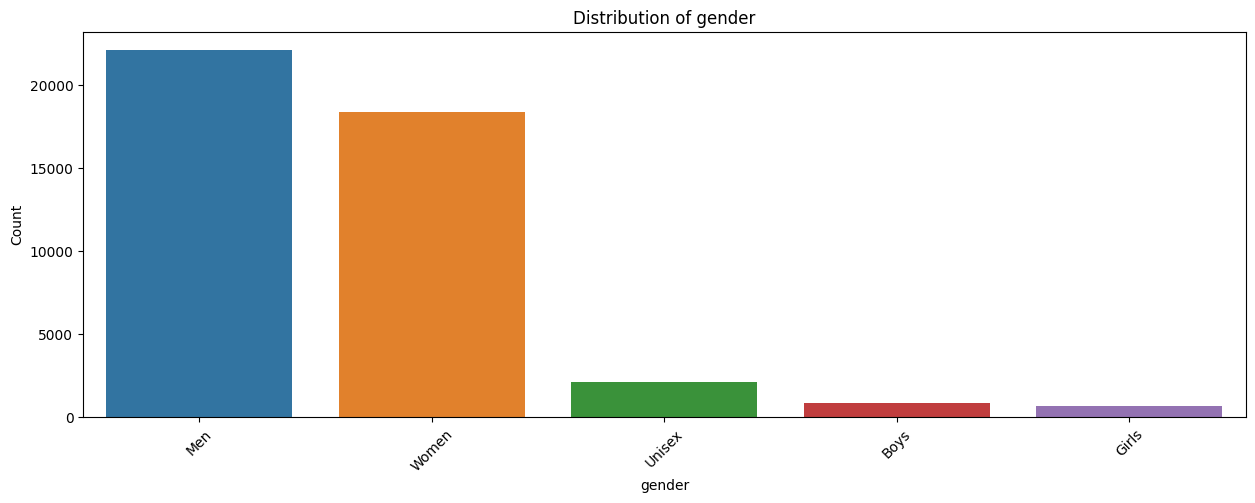

Unique values in 'subCategory':
['Topwear' 'Bottomwear' 'Watches' 'Socks' 'Shoes' 'Belts' 'Flip Flops'
 'Bags' 'Innerwear' 'Sandal' 'Shoe Accessories' 'Fragrance' 'Jewellery'
 'Lips' 'Saree' 'Eyewear' 'Scarves' 'Dress' 'Loungewear and Nightwear'
 'Wallets' 'Apparel Set' 'Headwear' 'Mufflers' 'Skin Care' 'Makeup'
 'Free Gifts' 'Ties' 'Accessories' 'Nails' 'Beauty Accessories'
 'Water Bottle' 'Skin' 'Eyes' 'Bath and Body' 'Gloves'
 'Sports Accessories' 'Cufflinks' 'Sports Equipment' 'Stoles' 'Hair'
 'Perfumes' 'Home Furnishing' 'Umbrellas' 'Wristbands' 'Vouchers']




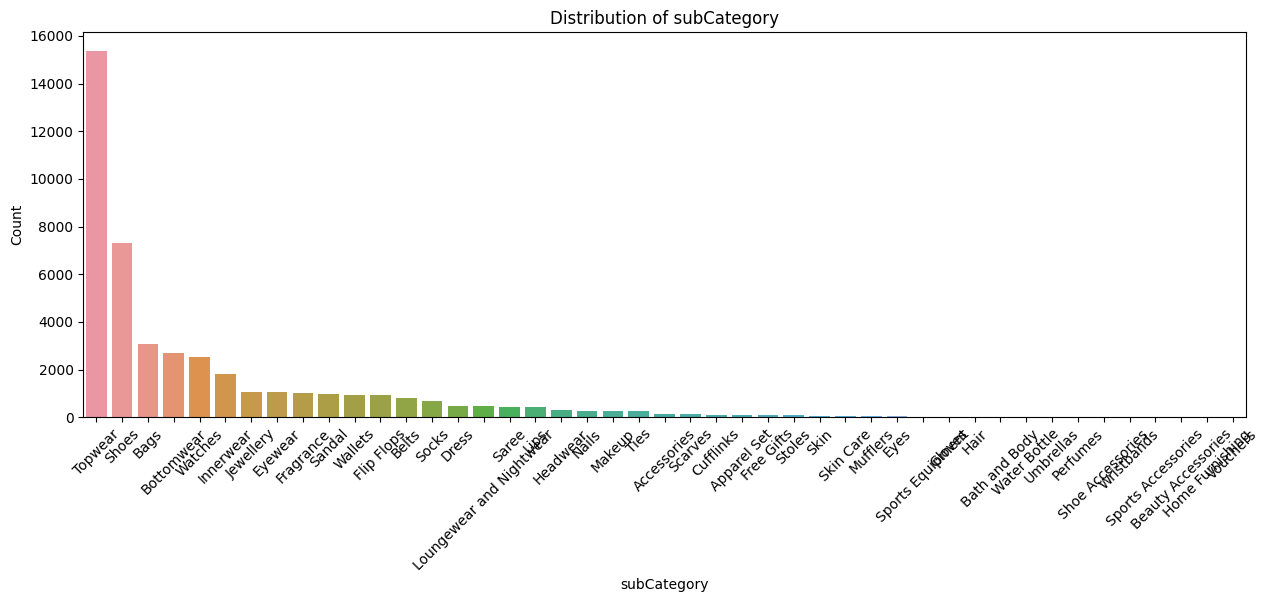

Unique values in 'baseColour':
['Navy Blue' 'Blue' 'Silver' 'Black' 'Grey' 'Green' 'Purple' 'White'
 'Beige' 'Brown' 'Bronze' 'Teal' 'Copper' 'Pink' 'Off White' 'Maroon'
 'Red' 'Khaki' 'Orange' 'Yellow' 'Charcoal' 'Gold' 'Steel' 'Tan' 'Multi'
 'Magenta' 'Lavender' 'Sea Green' 'Cream' 'Peach' 'Olive' 'Skin'
 'Burgundy' 'Coffee Brown' 'Grey Melange' 'Rust' 'Rose' 'Lime Green'
 'Mauve' 'Turquoise Blue' 'Metallic' 'Mustard' 'Taupe' 'Nude'
 'Mushroom Brown' 'Fluorescent Green']




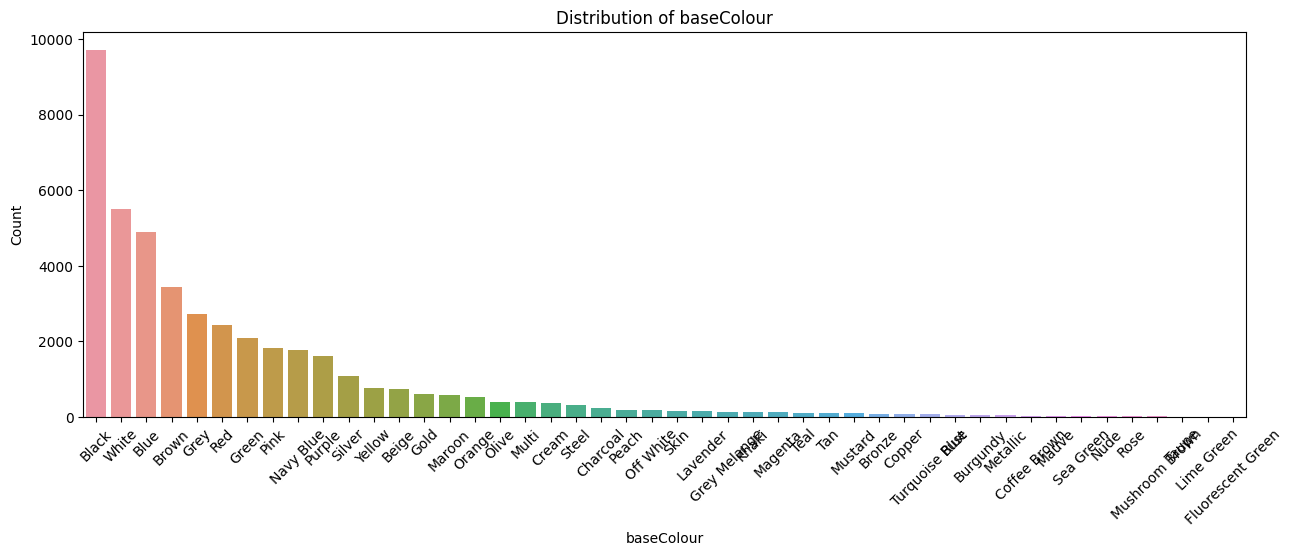

Unique values in 'season':
['Fall' 'Summer' 'Winter' 'Spring']




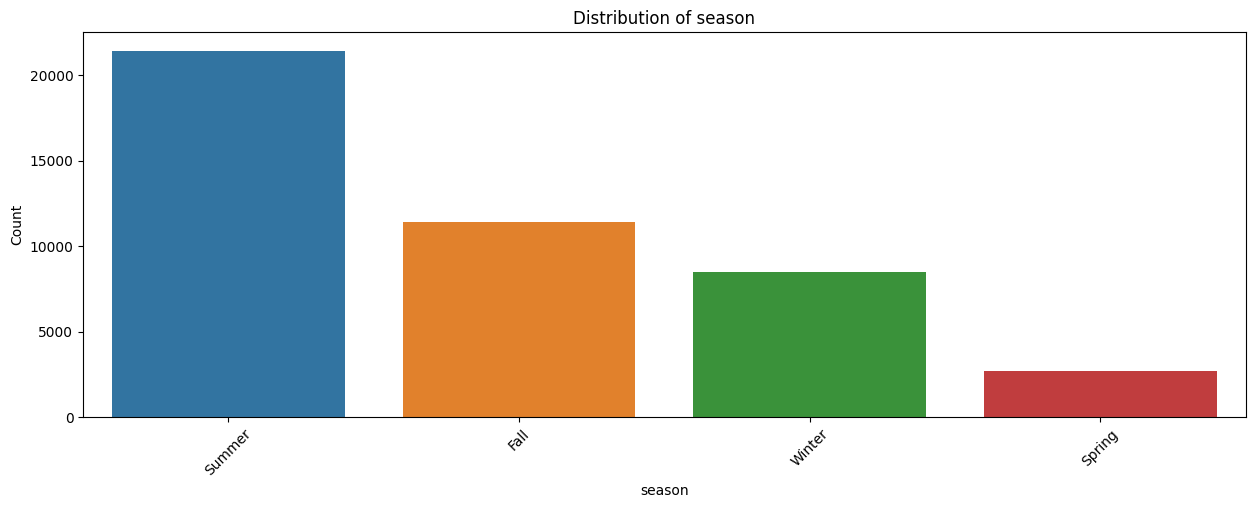

Unique values in 'usage':
['Casual' 'Ethnic' 'Formal' 'Sports' 'Smart Casual' 'Travel' 'Party'
 'Home']




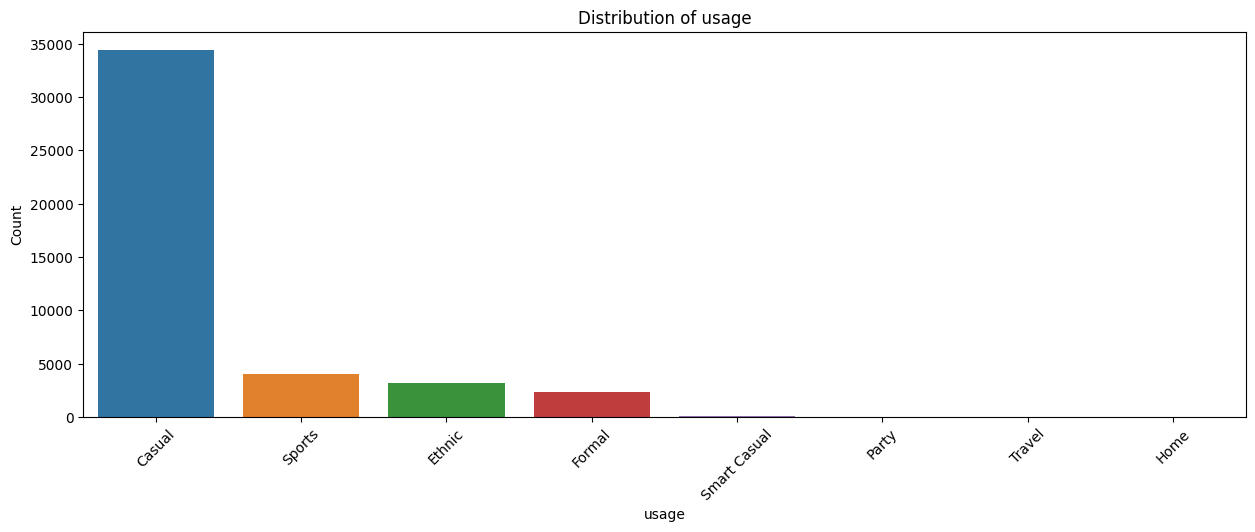

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your DataFrame named styles_df
# Print unique values in each column and visualize
for column in styles_df.columns:
    if column == 'id':  # Skip the 'id' column
        continue

    print(f"Unique values in '{column}':")
    print(styles_df[column].unique())
    print("\n")

    # Visualize the distribution for categorical columns
    plt.figure(figsize=(15, 5))
    sns.countplot(data=styles_df, x=column, order=styles_df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)  # Rotate x labels if needed
    plt.ylabel('Count')
    plt.show()


In [12]:
df.info

<bound method DataFrame.info of           id gender subCategory baseColour  season   usage
0      15970    Men     Topwear  Navy Blue    Fall  Casual
1      39386    Men  Bottomwear       Blue  Summer  Casual
2      59263  Women     Watches     Silver  Winter  Casual
3      21379    Men  Bottomwear      Black    Fall  Casual
4      53759    Men     Topwear       Grey  Summer  Casual
...      ...    ...         ...        ...     ...     ...
44419  17036    Men       Shoes      White  Summer  Casual
44420   6461    Men  Flip Flops        Red  Summer  Casual
44421  18842    Men     Topwear       Blue    Fall  Casual
44422  46694  Women   Fragrance       Blue  Spring  Casual
44423  51623  Women     Watches       Pink  Winter  Casual

[44072 rows x 6 columns]>

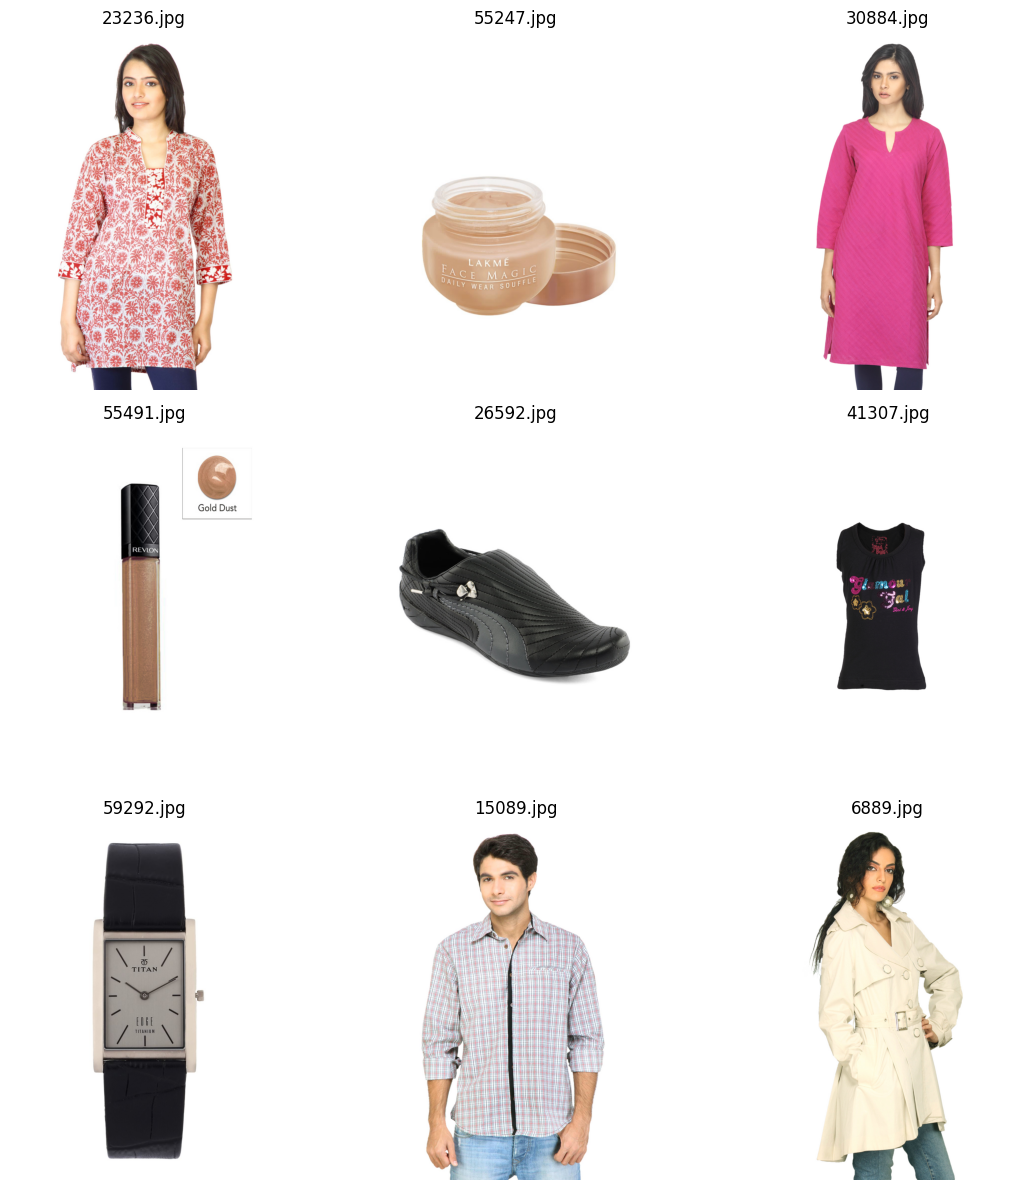

In [13]:
import random

# Set the directory containing the images
image_dir = '/kaggle/input/fashion-product-images-dataset/fashion-dataset/images'

# Get a list of all image filenames in the directory
image_filenames = os.listdir(image_dir)

# Filter to include only image files (adjust extensions as needed)
image_filenames = [f for f in image_filenames if f.endswith(('jpg', 'jpeg', 'png'))]

# Check the number of available images
num_images = len(image_filenames)
if num_images < 9:
    print(f"Only {num_images} images found. Selecting all available images.")
    selected_images = image_filenames  # Select all available images
else:
    # Randomly select 9 images
    selected_images = random.sample(image_filenames, 9)

# Set up the plot
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()

# Loop through the selected images and plot them
for ax, img_filename in zip(axes, selected_images):
    # Load the image
    img_path = os.path.join(image_dir, img_filename)
    img = cv2.imread(img_path)
    
    # Check if the image was loaded properly
    if img is None:
        print(f"Image {img_filename} could not be loaded.")
        ax.axis('off')  # Hide the axes for this subplot
        ax.set_title(f"Failed to load")
        continue  # Skip this image

    # Convert BGR to RGB (OpenCV loads images in BGR format)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Display the image
    ax.imshow(img)
    ax.set_title(img_filename)
    ax.axis('off')  # Hide the axes

# Show the plot
plt.tight_layout()
plt.show()


In [32]:
df = styles_df[:15000].copy()

In [33]:
def remove_outliers(data, labels):
    """Remove outliers based on IQR."""
    # Convert labels to a DataFrame for easier manipulation
    df_labels = pd.DataFrame(labels)

    # Calculate the IQR for each class
    Q1 = df_labels.quantile(0.25)
    Q3 = df_labels.quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outlier_condition = ((df_labels < (Q1 - 1.5 * IQR)) | (df_labels > (Q3 + 1.5 * IQR))).any(axis=1)
    
    # Keep only the rows that are not outliers
    clean_data = data[~outlier_condition]
    clean_labels = labels[~outlier_condition]

    return clean_data, clean_labels


# pre

In [14]:
df['id'] = df['id'].apply(lambda x: IMAGES_PATH+str(x) +'.jpg')
image_ids = df.pop('id')

In [15]:
def bin_values(x):
    x_vc = df[x].value_counts()
    x_other = x_vc[x_vc<50].index
    df.loc[df[x].isin(x_other),x] = 'Other'
    
    
for col in df.columns:
    bin_values(col)

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelBinarizer
from keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tqdm import tqdm


In [17]:
# Data Augmentation Configuration
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [18]:
IMAGE_DIMS = (180, 180, 3)

def load_image(imagePath):
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (IMAGE_DIMS[1], IMAGE_DIMS[0]))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = preprocess_input(image)
    return image

In [19]:
image_data = []
for img_path in tqdm(image_ids[:13200]):
    image_data.append(load_image(img_path))

100%|██████████| 13200/13200 [06:02<00:00, 36.42it/s]


In [20]:
# Convert the list to a NumPy array
image_data = np.array(image_data)

# Now you can check the shape
print("Image data shape:", image_data.shape)

Image data shape: (13200, 180, 180, 3)


In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelBinarizer

# Sample size
sample_size = 13000  # Ensure this matches the size of image_data_sampled

# Sample image data
image_data_sampled = image_data[:sample_size]  # Adjust this according to your data

# Create binarized labels
subCategoryLB = LabelBinarizer()
genderLB = LabelBinarizer()
baseColourLB = LabelBinarizer()
seasonLB = LabelBinarizer()
usageLB = LabelBinarizer()

# Assuming df is your DataFrame containing the labels
subCategoryLabels = subCategoryLB.fit_transform(np.array(df['subCategory'].values[:sample_size]))  # Adjust to sampled data
genderLabels = genderLB.fit_transform(np.array(df['gender'].values[:sample_size]))  # Adjust to sampled data
baseColourLabels = baseColourLB.fit_transform(np.array(df['baseColour'].values[:sample_size]))  # Adjust to sampled data
seasonLabels = seasonLB.fit_transform(np.array(df['season'].values[:sample_size]))  # Adjust to sampled data
usageLabels = usageLB.fit_transform(np.array(df['usage'].values[:sample_size]))  # Adjust to sampled data

# Initialize StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform stratified splitting based on the first label (subCategory in this case)
for train_index, test_index in sss.split(image_data_sampled, np.argmax(subCategoryLabels, axis=1)):
    trainX, testX = image_data_sampled[train_index], image_data_sampled[test_index]
    trainSubCategoryY, testSubCategoryY = subCategoryLabels[train_index], subCategoryLabels[test_index]
    trainGenderY, testGenderY = genderLabels[train_index], genderLabels[test_index]
    trainBaseColourY, testBaseColourY = baseColourLabels[train_index], baseColourLabels[test_index]
    trainSeasonY, testSeasonY = seasonLabels[train_index], seasonLabels[test_index]
    trainUsageY, testUsageY = usageLabels[train_index], usageLabels[test_index]

# Print the shapes of the resulting datasets
print("Training data shapes:")
print(f"trainX shape: {trainX.shape}")
print(f"trainSubCategoryY shape: {trainSubCategoryY.shape}")
print(f"trainGenderY shape: {trainGenderY.shape}")
print(f"trainBaseColourY shape: {trainBaseColourY.shape}")
print(f"trainSeasonY shape: {trainSeasonY.shape}")
print(f"trainUsageY shape: {trainUsageY.shape}")

print("\nTesting data shapes:")
print(f"testX shape: {testX.shape}")
print(f"testSubCategoryY shape: {testSubCategoryY.shape}")
print(f"testGenderY shape: {testGenderY.shape}")
print(f"testBaseColourY shape: {testBaseColourY.shape}")
print(f"testSeasonY shape: {testSeasonY.shape}")
print(f"testUsageY shape: {testUsageY.shape}")


Training data shapes:
trainX shape: (10400, 180, 180, 3)
trainSubCategoryY shape: (10400, 30)
trainGenderY shape: (10400, 5)
trainBaseColourY shape: (10400, 36)
trainSeasonY shape: (10400, 4)
trainUsageY shape: (10400, 6)

Testing data shapes:
testX shape: (2600, 180, 180, 3)
testSubCategoryY shape: (2600, 30)
testGenderY shape: (2600, 5)
testBaseColourY shape: (2600, 36)
testSeasonY shape: (2600, 4)
testUsageY shape: (2600, 6)


In [37]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer

def remove_outliers(data, labels):
    """Remove outliers based on IQR and return cleaned data and indices."""
    # Convert labels to a DataFrame for easier manipulation
    df_labels = pd.DataFrame(labels)

    # Calculate the IQR for each class
    Q1 = df_labels.quantile(0.25)
    Q3 = df_labels.quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outlier_condition = ((df_labels < (Q1 - 1.5 * IQR)) | (df_labels > (Q3 + 1.5 * IQR))).any(axis=1)

    # Keep only the rows that are not outliers
    clean_indices = np.where(~outlier_condition)[0]
    clean_data = data[clean_indices]
    clean_labels = labels[clean_indices]

    return clean_data, clean_labels, clean_indices

# Sample size
sample_size = 13000  # Ensure this matches the size of image_data_sampled
image_data_sampled = image_data[:sample_size]  # Adjust this according to your data

# Create binarized labels
subCategoryLB = LabelBinarizer()
genderLB = LabelBinarizer()
baseColourLB = LabelBinarizer()
seasonLB = LabelBinarizer()
usageLB = LabelBinarizer()

subCategoryLabels = subCategoryLB.fit_transform(np.array(df['subCategory'].values[:sample_size]))  
genderLabels = genderLB.fit_transform(np.array(df['gender'].values[:sample_size]))  
baseColourLabels = baseColourLB.fit_transform(np.array(df['baseColour'].values[:sample_size]))  
seasonLabels = seasonLB.fit_transform(np.array(df['season'].values[:sample_size]))  
usageLabels = usageLB.fit_transform(np.array(df['usage'].values[:sample_size]))  

# Remove outliers for the subcategory first
image_data_clean, subCategoryLabels_clean, clean_indices = remove_outliers(image_data_sampled, subCategoryLabels)

# Now clean the other labels using the clean indices
genderLabels_clean = genderLabels[clean_indices]
baseColourLabels_clean = baseColourLabels[clean_indices]
seasonLabels_clean = seasonLabels[clean_indices]
usageLabels_clean = usageLabels[clean_indices]

# Clean the image data using the original sampled data with clean indices
image_data_clean = image_data_sampled[clean_indices]

# Print the shapes of the resulting datasets
print("Cleaned data shapes:")
print(f"image_data_clean shape: {image_data_clean.shape}")
print(f"subCategoryLabels_clean shape: {subCategoryLabels_clean.shape}")
print(f"genderLabels_clean shape: {genderLabels_clean.shape}")
print(f"baseColourLabels_clean shape: {baseColourLabels_clean.shape}")
print(f"seasonLabels_clean shape: {seasonLabels_clean.shape}")
print(f"usageLabels_clean shape: {usageLabels_clean.shape}")


Cleaned data shapes:
image_data_clean shape: (4593, 180, 180, 3)
subCategoryLabels_clean shape: (4593, 42)
genderLabels_clean shape: (4593, 5)
baseColourLabels_clean shape: (4593, 46)
seasonLabels_clean shape: (4593, 4)
usageLabels_clean shape: (4593, 8)


In [41]:
# Sample usage of image_data_clean
trainX, testX, trainSubCategoryY, testSubCategoryY, trainGenderY, testGenderY, trainBaseColourY, testBaseColourY, trainSeasonY, testSeasonY, trainUsageY, testUsageY = train_test_split(
    image_data_clean, subCategoryLabels_clean, genderLabels_clean, baseColourLabels_clean, seasonLabels_clean, usageLabels_clean, test_size=0.2, random_state=42
)


# Classification

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout
from tensorflow.keras.applications import ResNet50


In [38]:
from keras.applications import ResNet50
from keras.layers import Input, Flatten, Dense, BatchNormalization
from keras.models import Model

def make_branch(input_layer, num_classes, activation, name):
    """Create a dense branch for classification."""
    x = Dense(512, activation='relu')(input_layer)  # You can adjust the number of units here
    x = Dense(256, activation='relu')(x)
    x = Dense(32, activation='relu')(x)
    x = BatchNormalization()(x)

    x = Dense(128, activation='relu')(x)  # You can adjust the number of units here
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)
    x = BatchNormalization()(x)

    x = Dense(128, activation='relu')(x)  # You can adjust the number of units here
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)

    output_layer = Dense(num_classes, activation=activation, name=f'{name}_output')(x)
    return output_layer

def build_model(width, height):
    # Define image dimensions
    IMAGE_DIMS = (180, 180, 3)  # Assuming RGB images

    # Load the pre-trained ResNet50 model
    res50 = ResNet50(weights='imagenet', include_top=False, input_shape=IMAGE_DIMS)
    res50.trainable = False  # Freeze the layers of ResNet50 for transfer learning

    # Define the input layer
    inputs = Input(shape=IMAGE_DIMS)

    # Extract features using ResNet50
    x = res50(inputs, training=False)  # Set training=False to avoid updating the batch norm layers
    x = Flatten()(x)

    # Create branches for multi-output classification
    subCategory_branch = make_branch(x, len(subCategoryLB.classes_), 'softmax', 'subCategory')
    gender_branch = make_branch(x, len(genderLB.classes_), 'softmax', 'gender')
    color_branch = make_branch(x, len(baseColourLB.classes_), 'softmax', 'color')
    usage_branch = make_branch(x, len(usageLB.classes_), 'softmax', 'usage')
    season_branch = make_branch(x, len(seasonLB.classes_), 'softmax', 'season')  # Add season branch

    # Create the model with specified inputs and outputs
    model = Model(inputs=inputs,
                  outputs=[subCategory_branch, gender_branch, color_branch, usage_branch, season_branch])
    return model


In [39]:
from keras.optimizers import Adam

# Assuming `build_model` is defined elsewhere
model = build_model(180, 180)

# Define losses and metrics for all outputs
losses = {
    "subCategory_output": "categorical_crossentropy",
    "gender_output": "categorical_crossentropy",
    "color_output": "categorical_crossentropy",
    "usage_output": "categorical_crossentropy",
    "season_output": "categorical_crossentropy",  # Add season output
}

metrics = {
    "subCategory_output": "accuracy",
    "gender_output": "accuracy",
    "color_output": "accuracy",
    "usage_output": "accuracy",
    "season_output": "accuracy",  # Add season metrics
}

# Define a custom learning rate
learning_rate = 0.001  # You can adjust the value as needed

# Create an Adam optimizer with the custom learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the custom optimizer, loss functions, and metrics
model.compile(optimizer=optimizer, loss=losses, metrics=metrics)

# Print the model summary to verify the architecture
model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 180, 180,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 6, 6,      │ 23,587,712 │ input_layer_5[0]… │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 73728)     │          0 │ resnet50[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_90 (Dense)    │ (None, 512)       │ 37,749,248 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_99 (Dense)    │ (None, 512)       │ 37,749,248 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_108 (Dense)   │ (None, 512)       │ 37,749,248 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_117 (Dense)   │ (None, 512)       │ 37,749,248 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_126 (Dense)   │ (None, 512)       │ 37,749,248 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_91 (Dense)    │ (None, 256)       │    131,328 │ dense_90[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_100 (Dense)   │ (None, 256)       │    131,328 │ dense_99[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_109 (Dense)   │ (None, 256)       │    131,328 │ dense_108[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_118 (Dense)   │ (None, 256)       │    131,328 │ dense_117[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_127 (Dense)   │ (None, 256)       │    131,328 │ dense_126[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_92 (Dense)    │ (None, 32)        │      8,224 │ dense_91[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_101 (Dense)   │ (None, 32)        │      8,224 │ dense_100[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_110 (Dense)   │ (None, 32)        │      8,224 │ dense_109[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_119 (Dense)   │ (None, 32)        │      8,224 │ dense_118[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_128 (Dense)   │ (None, 32)        │      8,224 │ dense_127[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dense_92[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dense_101[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dense_110[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dense_119[0][0]   │
│ (BatchNormalizatio… │                   │            │                 

 Total params: 213,182,057 (813.23 MB)

 Trainable params: 189,593,705 (723.24 MB)

 Non-trainable params: 23,588,352 (89.98 MB)

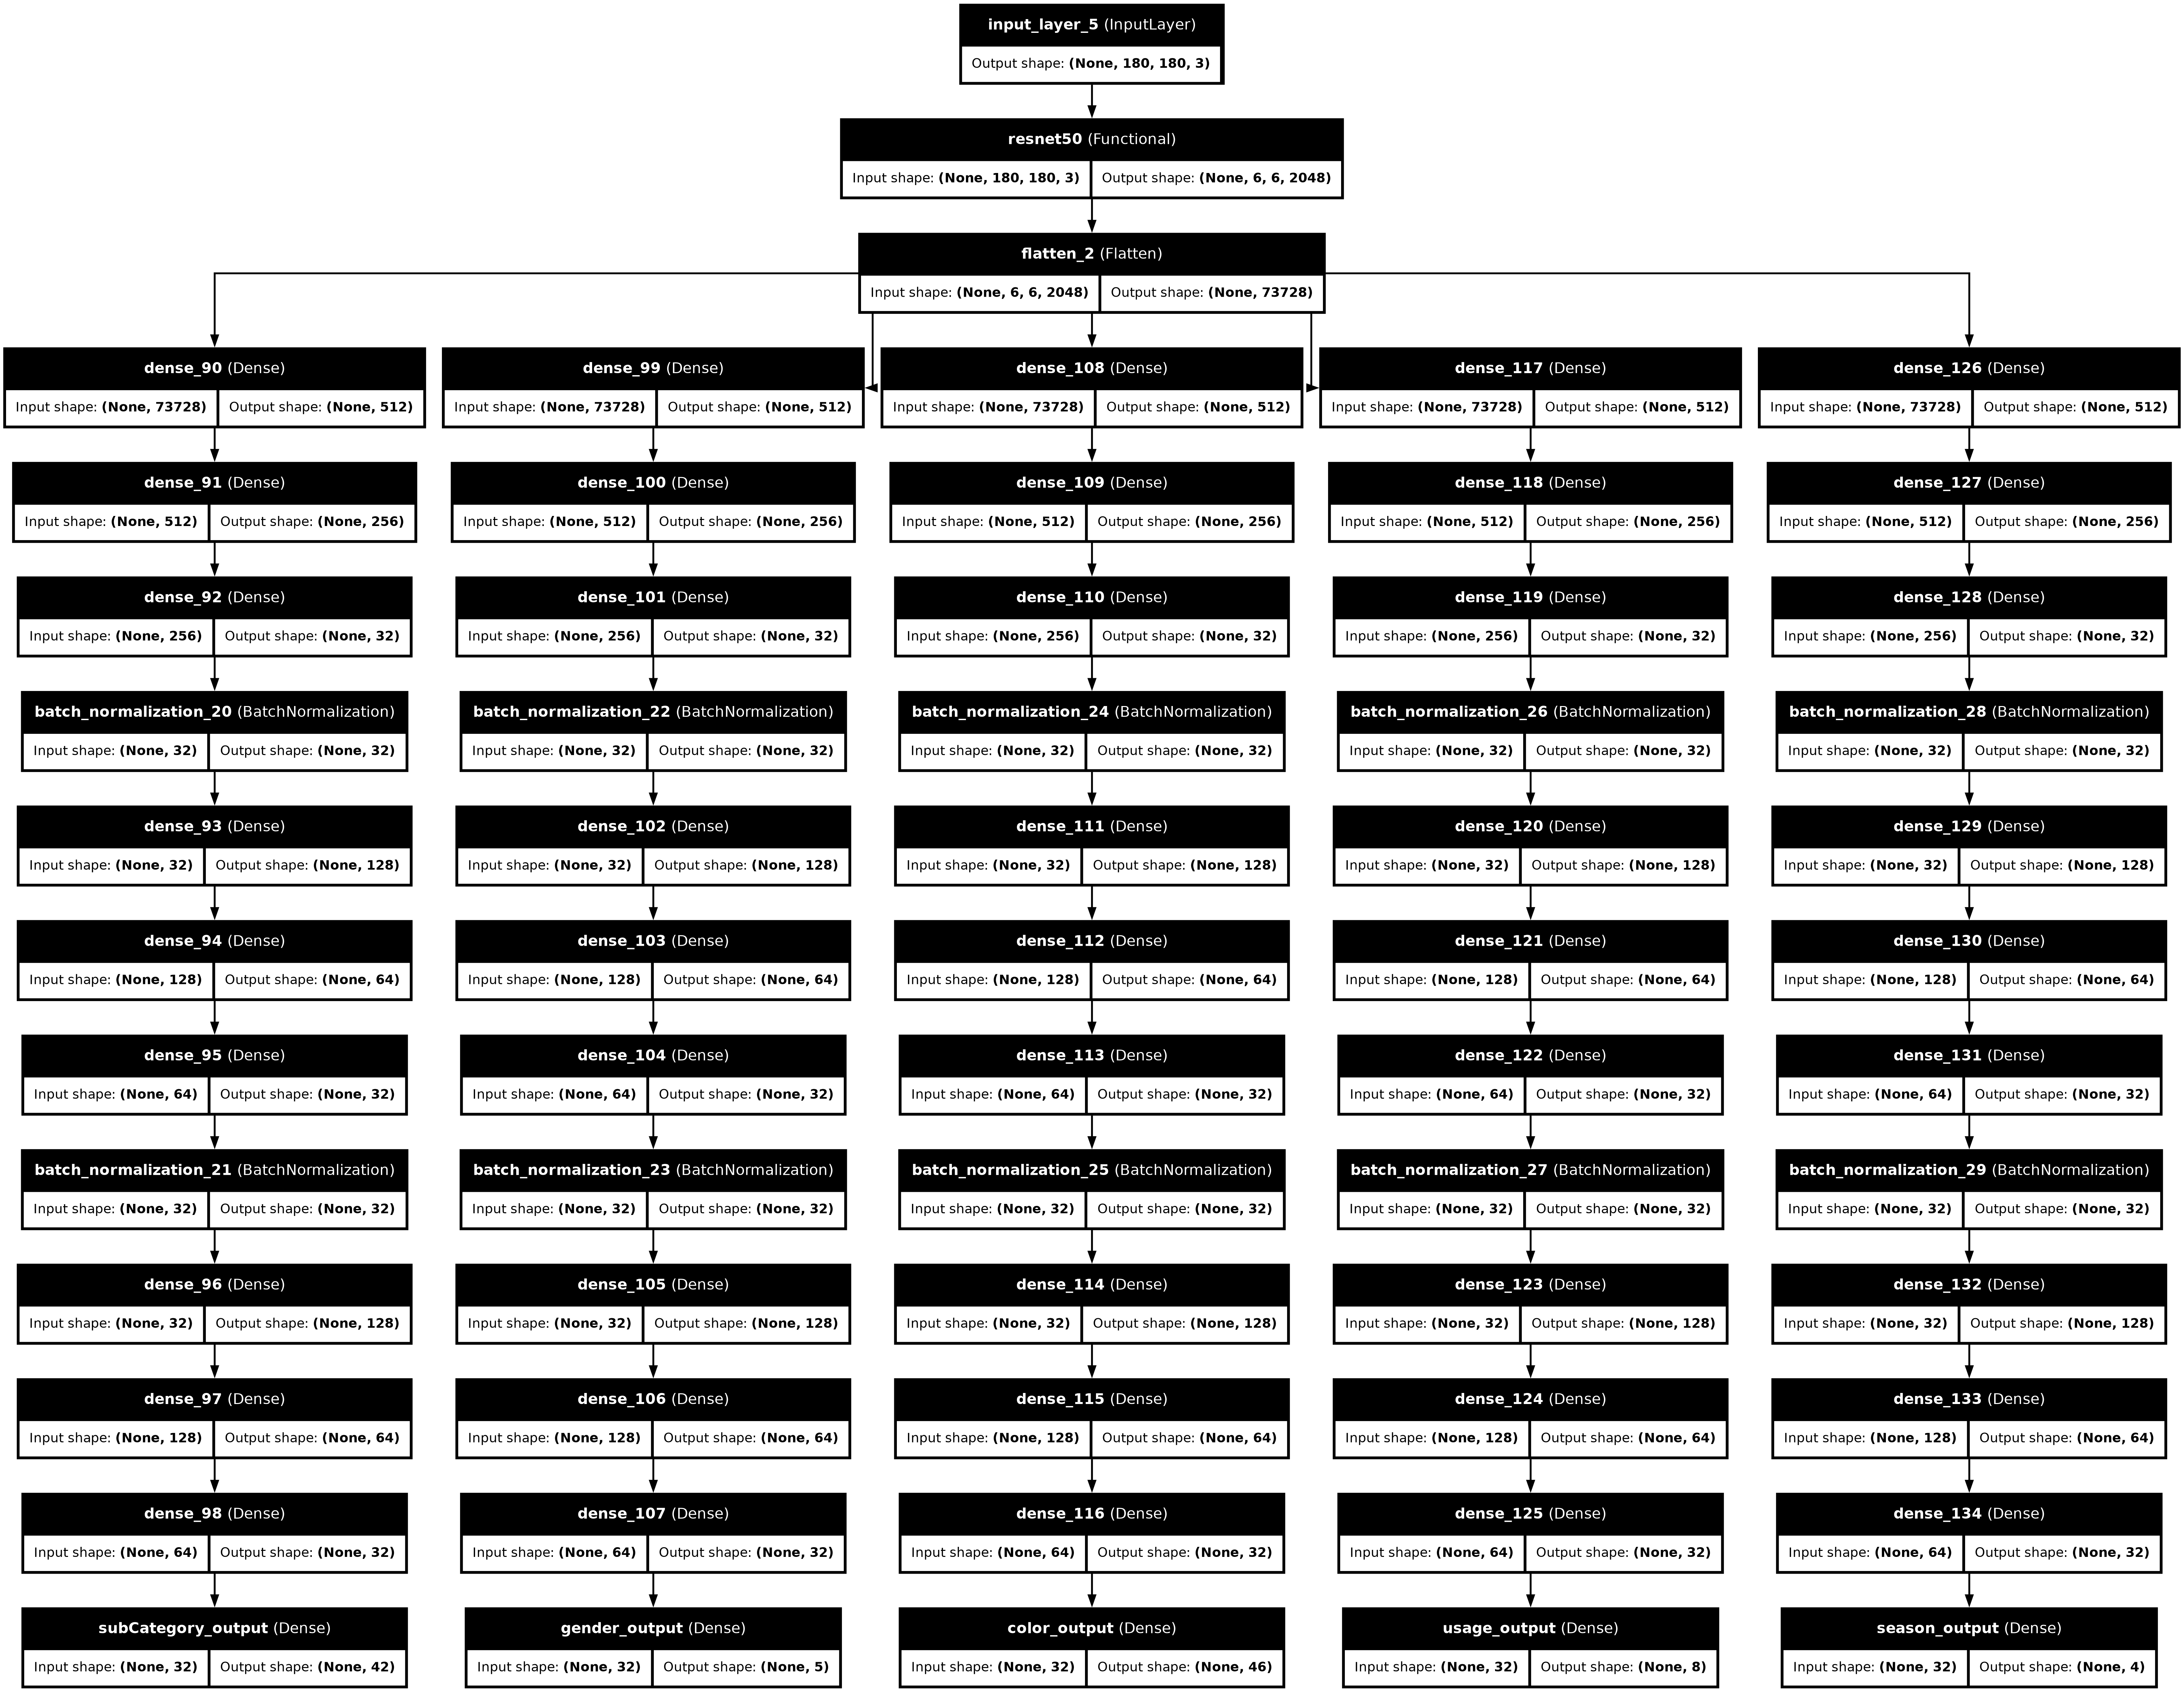

In [40]:
from tensorflow.keras.utils import plot_model

# Define the path to save the model plot
plot_model_path = 'model_plot.png'  # You can specify any path you want

# Plot the model
plot_model(model, to_file=plot_model_path, show_shapes=True, show_layer_names=True)


In [ ]:
# Fit the model with the cleaned data
H = model.fit(
    trainX,
    {
        "subCategory_output": trainSubCategoryY,
        "gender_output": trainGenderY,
        "color_output": trainBaseColourY,
        "usage_output": trainUsageY,
        "season_output": trainSeasonY,
    },
    validation_data=(
        testX,
        {
            "subCategory_output": testSubCategoryY,
            "gender_output": testGenderY,
            "color_output": testBaseColourY,
            "usage_output": testUsageY,
            "season_output": testSeasonY,
        }
    ),
    epochs=40,
    batch_size=32,
    verbose=1
)


Epoch 1/40
  1/115 ━━━━━━━━━━━━━━━━━━━━ 1:02:57 33s/step - color_output_accuracy: 0.0312 - gender_output_accuracy: 0.4688 - loss: 12.9419 - season_output_accuracy: 0.1250 - subCategory_output_accuracy: 0.0000e+00 - usage_output_accuracy: 0.3438

I0000 00:00:1729299852.017218     133 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_33', 68 bytes spill stores, 68 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_32', 116 bytes spill stores, 116 bytes spill loads



115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - color_output_accuracy: 0.1984 - gender_output_accuracy: 0.8476 - loss: 7.4118 - season_output_accuracy: 0.6068 - subCategory_output_accuracy: 0.7449 - usage_output_accuracy: 0.7363

I0000 00:00:1729299880.727266     136 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_42', 40 bytes spill stores, 40 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_41', 68 bytes spill stores, 68 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_40', 116 bytes spill stores, 116 bytes spill loads



115/115 ━━━━━━━━━━━━━━━━━━━━ 74s 361ms/step - color_output_accuracy: 0.1991 - gender_output_accuracy: 0.8481 - loss: 7.3925 - season_output_accuracy: 0.6073 - subCategory_output_accuracy: 0.7465 - usage_output_accuracy: 0.7369 - val_color_output_accuracy: 0.3079 - val_gender_output_accuracy: 0.9521 - val_loss: 3.8340 - val_season_output_accuracy: 0.7051 - val_subCategory_output_accuracy: 1.0000 - val_usage_output_accuracy: 0.8215
Epoch 2/40
115/115 ━━━━━━━━━━━━━━━━━━━━ 13s 116ms/step - color_output_accuracy: 0.4270 - gender_output_accuracy: 0.9382 - loss: 3.0382 - season_output_accuracy: 0.7732 - subCategory_output_accuracy: 1.0000 - usage_output_accuracy: 0.8966 - val_color_output_accuracy: 0.3645 - val_gender_output_accuracy: 0.9510 - val_loss: 3.5733 - val_season_output_accuracy: 0.7421 - val_subCategory_output_accuracy: 1.0000 - val_usage_output_accuracy: 0.8433
Epoch 3/40
115/115 ━━━━━━━━━━━━━━━━━━━━ 13s 116ms/step - color_output_accuracy: 0.5587 - gender_output_accuracy: 0.9675 -

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


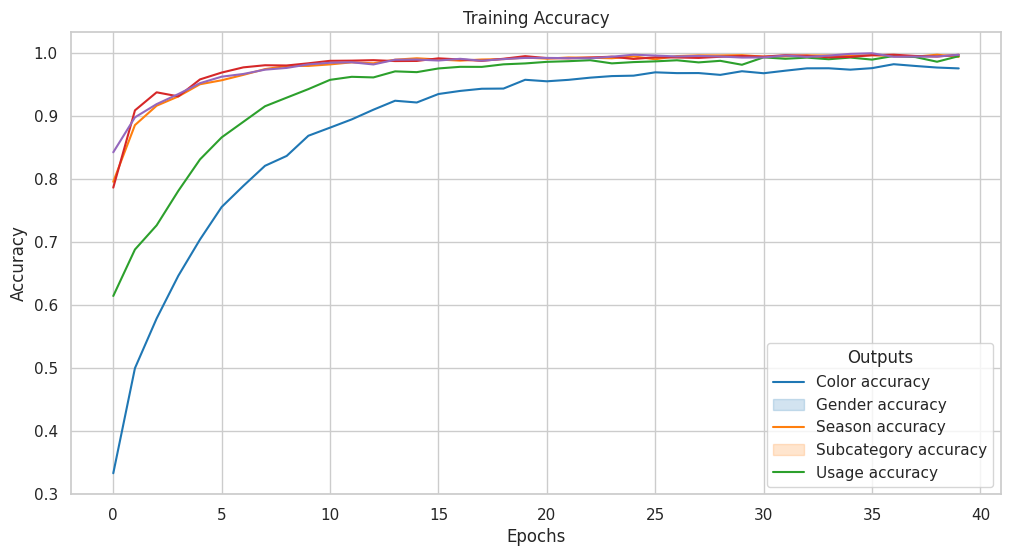

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


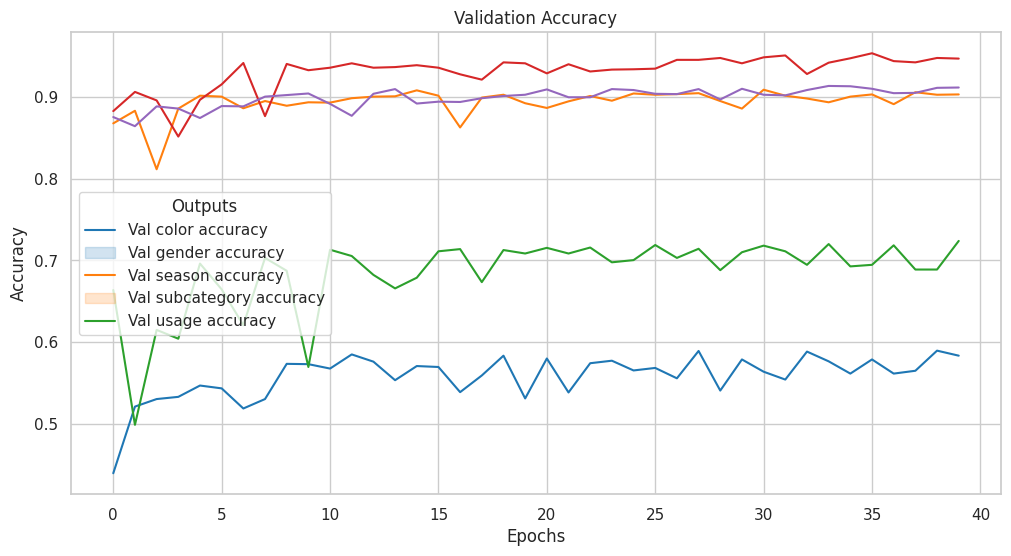

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


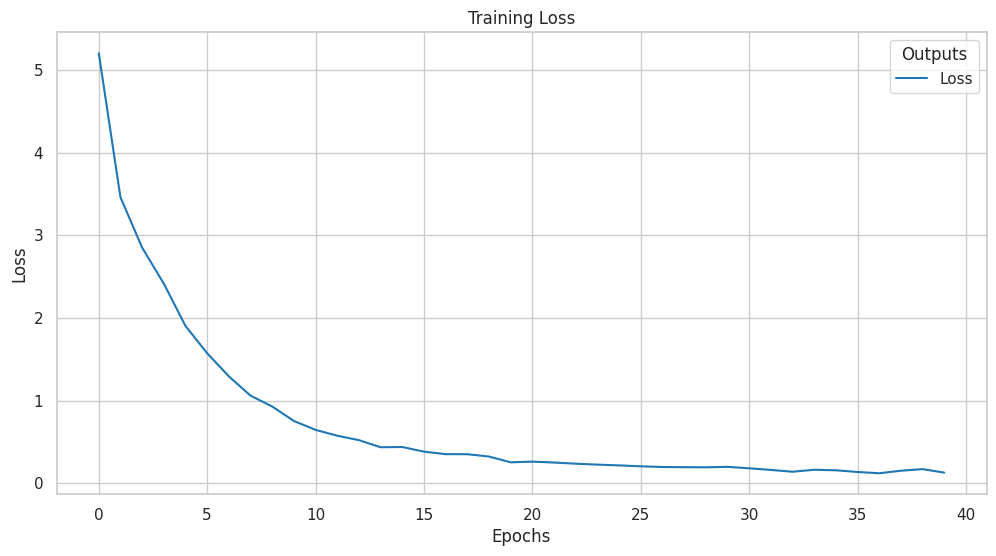

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


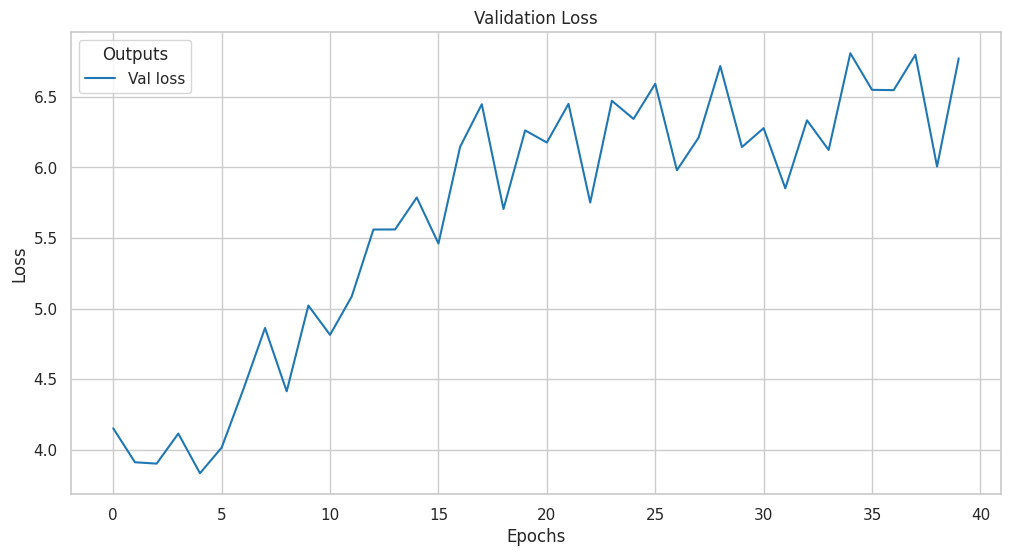

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the Seaborn style for the plots
sns.set(style="whitegrid")

# Assuming H is the history object returned by model.fit()
h_df = pd.DataFrame(H.history)

# Convert inf values to NaN in the history DataFrame
h_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Plot accuracy for training
plt.figure(figsize=(12, 6))
sns.lineplot(data=h_df.loc[:, [col for col in h_df.columns if 'accuracy' in col and 'val' not in col]], 
             dashes=False, palette="tab10")
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(title='Outputs', labels=[
    col.replace('_output', '').replace('_', ' ').capitalize() 
    for col in h_df.columns if 'accuracy' in col and 'val' not in col
])
plt.grid(True)
plt.show()

# Plot accuracy for validation
plt.figure(figsize=(12, 6))
sns.lineplot(data=h_df.loc[:, [col for col in h_df.columns if 'accuracy' in col and 'val' in col]], 
             dashes=False, palette="tab10")
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(title='Outputs', labels=[
    col.replace('_output', '').replace('_', ' ').capitalize() 
    for col in h_df.columns if 'accuracy' in col and 'val' in col
])
plt.grid(True)
plt.show()

# Plot loss for training
plt.figure(figsize=(12, 6))
sns.lineplot(data=h_df.loc[:, [col for col in h_df.columns if 'loss' in col and 'val' not in col]], 
             dashes=False, palette="tab10")
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(title='Outputs', labels=[
    col.replace('_output', '').replace('_', ' ').capitalize() 
    for col in h_df.columns if 'loss' in col and 'val' not in col
])
plt.grid(True)
plt.show()

# Plot loss for validation
plt.figure(figsize=(12, 6))
sns.lineplot(data=h_df.loc[:, [col for col in h_df.columns if 'loss' in col and 'val' in col]], 
             dashes=False, palette="tab10")
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(title='Outputs', labels=[
    col.replace('_output', '').replace('_', ' ').capitalize() 
    for col in h_df.columns if 'loss' in col and 'val' in col
])
plt.grid(True)
plt.show()


In [ ]:
# Assuming `model` is your trained model
model.save('my_model.h5')  # Save the model in HDF5 format


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('my_model.h5')


In [ ]:
# Load the model from the .pickle file
with open('/kaggle/working/my_model.pickle', 'rb') as f:
    model_dict = pickle.load(f)

# Recreate the model from the architecture
from tensorflow.keras.models import model_from_json

model = model_from_json(model_dict['architecture'])  # Load architecture
model.set_weights(model_dict['weights'])              # Load weights
